In [4]:
import os, sys
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import collections, colors, transforms

In [5]:
def ContributorsChart(Z, filename):
    plt.figure(figsize=(20,3))
    plt.pcolormesh(Z, cmap='YlGn')
    plt.title('Contribution chart', fontweight ="bold")
    ax = plt.gca;
    days = ["Sat", "Fri", "Thur", "Wed", "Tues", "Mon", "Sun"];
    plt.yticks(np.arange(0.5, 7.5, step=1), days)
    plt.savefig(filename, dpi=600, bbox_inches='tight', pad_inches=0)
    plt.show()

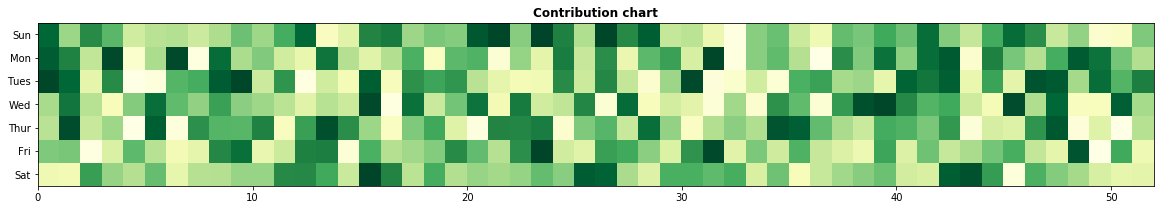

In [6]:
Z = Z = np.random.rand(7, 52)
ContributorsChart(Z, "contrichart")

In [7]:
def LanguageChart(results, category_names, filename):
      labels = list(results.keys())
      data = np.array(list(results.values()))
      data_cum = data.cumsum(axis=1)
      category_colors = plt.get_cmap('RdYlGn')(
          np.linspace(0.15, 0.85, data.shape[1]))

      fig, ax = plt.subplots(figsize=(10, 1))
      ax.invert_yaxis()
      ax.xaxis.set_visible(False)
      ax.set_xlim(0, np.sum(data, axis=1).max())

      for i, (colname, color) in enumerate(zip(category_names, category_colors)):
          widths = data[:, i]
          starts = data_cum[:, i] - widths
          ax.barh(labels, widths, left=starts, height=0.5,
                  label=colname, color=color)
          xcenters = starts + widths / 2

          r, g, b, _ = color
          text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
          for y, (x, c) in enumerate(zip(xcenters, widths)):
              ax.text(x, y, str(int(c)), ha='center', va='center',
                      color=text_color)
      ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
                loc='lower left', fontsize='small')
      plt.savefig(filename, dpi=600, bbox_inches='tight', pad_inches=0)
      return fig, ax

(<Figure size 720x72 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x262c352b988>)

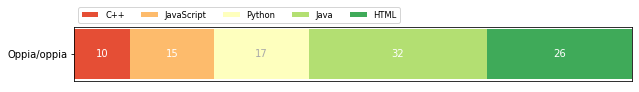

In [8]:
category_names = ['C++', 'JavaScript',
                    'Python', 'Java', 'HTML']
results = {
      'Oppia/oppia': [10, 15, 17, 32, 26]
}

LanguageChart(results, category_names, "language")

  

In [9]:
def SplitChart (category_names, min_values, max_values, mean_values, xlabel, ylabel, filename):
    plt.grid(color='#F2F2F2', alpha=1, zorder=0)
    plt.plot(category_names, max_values, label = "Maximal average")
    plt.plot(category_names, min_values, label = "Minimal average")
    plt.plot(category_names, mean_values, label = "User average")
    plt.xlabel(xlabel, fontsize=13)
    plt.xticks(rotation=30)
    plt.ylabel(ylabel, fontsize=13)
    #plt.legend()
    plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.savefig(filename, dpi=600, bbox_inches='tight', pad_inches=0)
    plt.show()

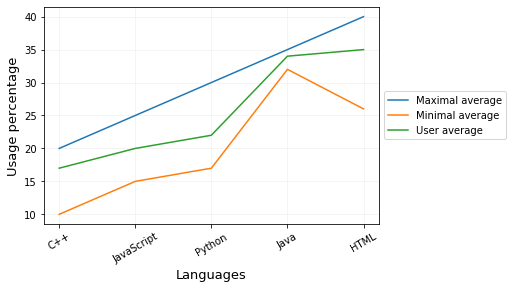

In [10]:
category_names = ['C++', 'JavaScript',
                    'Python', 'Java', 'HTML']
min_values =  [10, 15, 17, 32, 26]
max_values = [20, 25, 30, 35, 40]
mean_values = [17, 20, 22, 34, 35]
SplitChart (category_names, min_values, max_values, mean_values, "Languages", "Usage percentage", "samplechart")